# Random forest importance

In [2]:
%store -r X
%store -r y
%store -r X_test
%store -r y_test
%store -r feature_names

In [3]:
# Import thư viện
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành training set và validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print("Kích thước của tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước của tập xác thực:", X_val.shape, y_val.shape)

Kích thước của tập huấn luyện: (10532, 20, 128) (10532,)
Kích thước của tập xác thực: (2634, 20, 128) (2634,)


In [5]:
import matplotlib.pyplot as plt

# Reshape data
# Data ban đầu X(13166, 20, 128), y(13166)

# Reshape X về dạng 2d => X_2d(263320, 128), giữ nguyên 128 và đó là các đặc trưng
X_2d = X_train.reshape(-1, X.shape[-1])
# Reshape y thành y_reshaped(263320) bằng cách lặp mỗi phần tử trong y 20 lần
y_reshaped = np.repeat(y_train, 20)

In [6]:
# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=500)
# Nó chỉ định số lượng cây quyết định sẽ được xây dựng và kết hợp để tạo thành khu rừng ngẫu nhiên trong thuật toán random forest.

In [7]:
# Huấn luyện mô hình
model.fit(X_2d, y_reshaped)

RandomForestClassifier(n_estimators=500)

In [8]:
# Lấy tầm quan trọng của đặc trưng
feature_importances = model.feature_importances_

# In tầm quan trọng của đặc trưng
print(feature_importances)

[0.016927   0.01344853 0.01347373 0.01284615 0.01304525 0.01288773
 0.01312679 0.01275341 0.01277207 0.01308538 0.01300093 0.0126481
 0.01933167 0.03091139 0.03163429 0.03280054 0.02403321 0.03302339
 0.02621232 0.02413047 0.01524479 0.01970475 0.01682831 0.0181636
 0.01540703 0.01422348 0.01504434 0.01688891 0.01199321 0.00861748
 0.00844218 0.00566456 0.00519537 0.00485949 0.00492335 0.0054864
 0.00449097 0.00483682 0.00436777 0.00514768 0.00464654 0.00471377
 0.00454532 0.00506637 0.00429852 0.00410623 0.00421739 0.00460169
 0.00426227 0.00483351 0.00415331 0.00440412 0.00540121 0.00576312
 0.00503582 0.00513451 0.00540087 0.00642476 0.00648588 0.00608221
 0.00844815 0.00687055 0.00626462 0.00585206 0.00482465 0.00457683
 0.0048117  0.00446903 0.00484965 0.00430619 0.00492802 0.00482484
 0.00474694 0.00508031 0.00521535 0.00422924 0.00460749 0.00427055
 0.00545191 0.00620304 0.00526893 0.00534262 0.00508507 0.00529905
 0.00491438 0.00467989 0.00400662 0.00382769 0.00361767 0.0037311

In [9]:
feature_importances.shape

(128,)

In [10]:
# Tạo dataframe gồm tên đặc trưng và tầm quan trọng
feature_importances_df = pd.DataFrame({"feature_name": feature_names, "importance": feature_importances})

# Sắp xếp dataframe theo tầm quan trọng
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

# Lấy index của dataframe
indices = feature_importances_df.index

# In index
print(indices)

Index([ 17,  15,  14,  13,  18,  19,  16,  21,  12,  23,
       ...
        87, 109,  90,  89, 104, 107,  88, 115, 103, 106],
      dtype='int64', length=128)


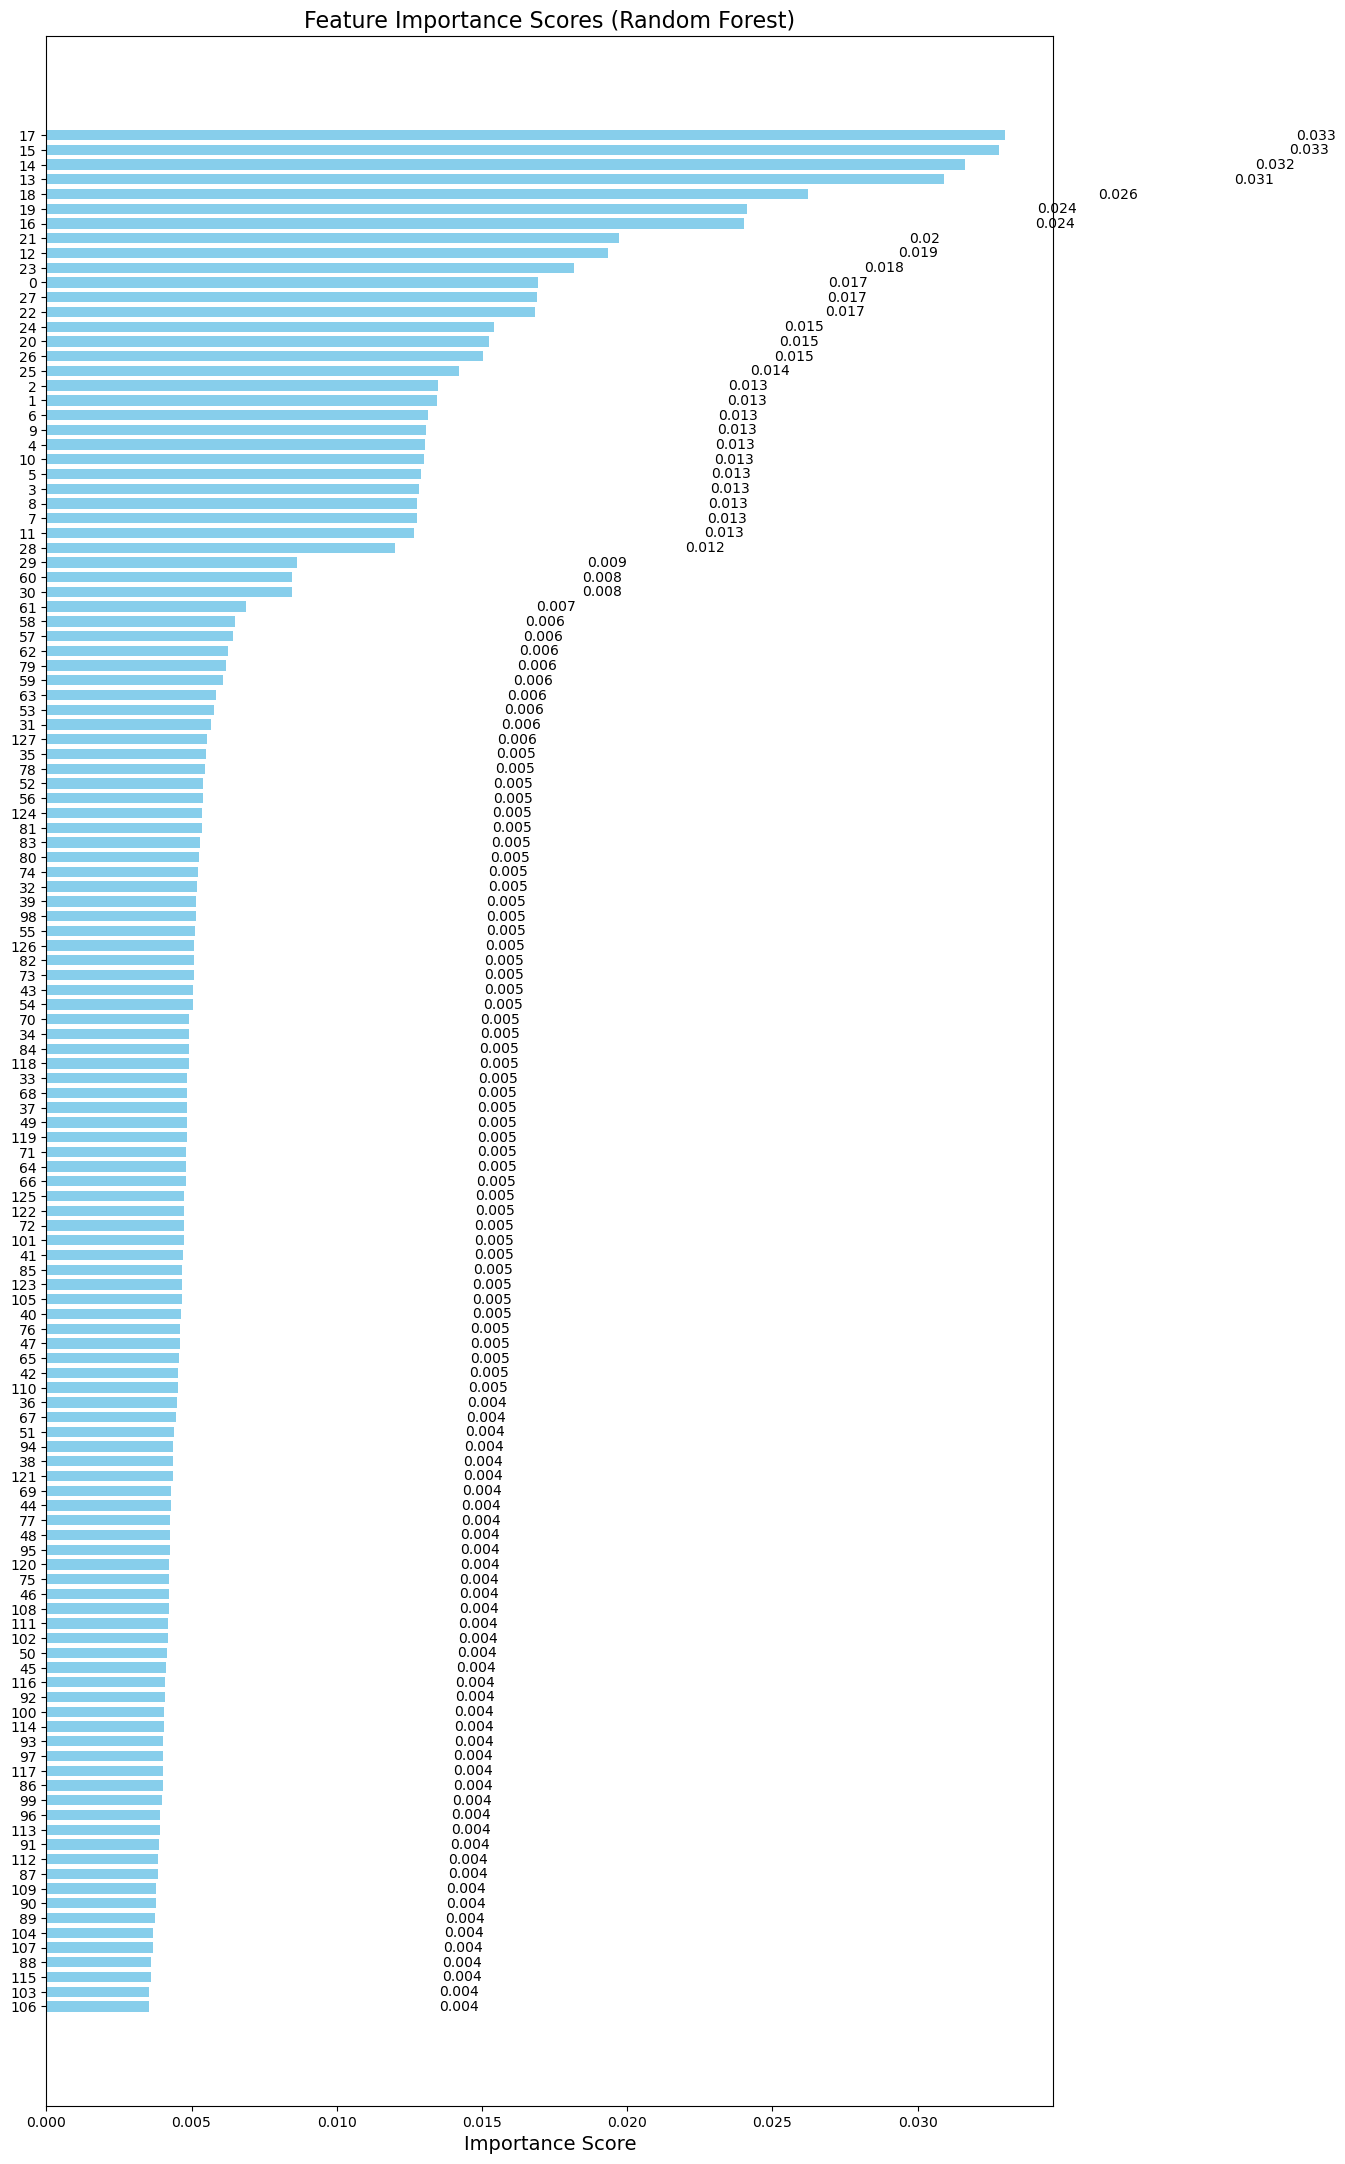

In [11]:
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots(figsize=(14, 22))  # Increase figure size for more space
y_pos = np.arange(len(feature_importances_df))
bar_height = 0.7  # Increase bar height for more space between bars
ax.barh(y_pos, feature_importances_df["importance"], align="center", color='skyblue', height=bar_height)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_importances_df["feature_name"], fontsize=10)  # Reduce font size if necessary
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score", fontsize=14)
ax.set_title("Feature Importance Scores (Random Forest)", fontsize=16)

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate(feature_importances_df["importance"]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="normal", fontsize=10, verticalalignment='center')  # Adjust position and alignment

plt.tight_layout(pad=2.0)  # Add padding for better layout
plt.show()

In [12]:
# Xác định số đặc trưng sẽ giữ lại để train  model
k = 64
top_k_indices = indices[:k]

In [13]:
# Giữ lại k đặc trưng tốt nhất trong tệp dữ liệu ban đầu
selected_X = X_train[:,:,top_k_indices]
selected_X_val = X_val[:,:,top_k_indices]
selected_X_test = X_test[:,:,top_k_indices]

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Khởi tạo mô hình
model = keras.Sequential()

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(20, k, 1), padding='same'))

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Flatten để làm phẳng đầu ra của lớp trước khi đi vào các lớp fully connected
model.add(layers.Flatten())

# Thêm lớp fully connected (Dense Layer) với 64 units và hàm kích hoạt ReLU
model.add(layers.Dense(64, activation='relu'))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp fully connected (Dense Layer) cuối cùng với số lớp đầu ra phụ thuộc vào bài toán của bạn
model.add(layers.Dense(5, activation='softmax'))

# In thông tin mô hình
model.summary()

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 20, 64, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 64, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 32, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         327,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 508,261 (1.94 MB)

 Trainable params: 508,261 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_64 = model.fit(selected_X, y_train, epochs=10, batch_size=16, validation_data=(selected_X_val, y_val))

Epoch 1/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.3960 - loss: 1.3538 - val_accuracy: 0.7312 - val_loss: 0.6221
Epoch 2/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 54s 82ms/step - accuracy: 0.6578 - loss: 0.7904 - val_accuracy: 0.8542 - val_loss: 0.4762
Epoch 3/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 74s 112ms/step - accuracy: 0.7322 - loss: 0.6561 - val_accuracy: 0.8747 - val_loss: 0.3546
Epoch 4/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 57s 86ms/step - accuracy: 0.7740 - loss: 0.5459 - val_accuracy: 0.8713 - val_loss: 0.3329
Epoch 5/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - accuracy: 0.7943 - loss: 0.5050 - val_accuracy: 0.8793 - val_loss: 0.3125
Epoch 6/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 66s 99ms/step - accuracy: 0.8303 - loss: 0.4192 - val_accuracy: 0.8945 - val_loss: 0.2928
Epoch 7/10
129/659 ━━━━━━━━━━━━━━━━━━━━ 1:06 126ms/step - accuracy: 0.8531 - loss: 0.3828

In [ ]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(selected_X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

# Dự đoán các nhãn trên tập kiểm tra
y_pred = model.predict(selected_X_test)

# Chuyển đổi dự đoán thành nhãn dự đoán (lớp dự đoán)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hiển thị ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred_classes)
print("Ma trận nhầm lẫn:")
print(confusion)

# Hiển thị báo cáo phân loại
class_report = classification_report(y_test, y_pred_classes, digits=4)
print("Báo cáo phân loại:")
print(class_report)

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def micro_metrics(y_true, y_pred):
  # Calculate micro averages
  micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='micro'
  )
    
  # Macro averages
  macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='macro'
  )
  return {
      'micro_precision': micro_precision,
      'micro_recall': micro_recall,
      'micro_f1': micro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'macro_f1': macro_f1
  }

In [ ]:
from tabulate import tabulate
micro_results = micro_metrics(y_test, y_pred)
# Prepare table data
table_data = [
  ["Micro Precision", micro_results['micro_precision']],
  ["Micro Recall", micro_results['micro_recall']],
  ["Micro F1-score", micro_results['micro_f1']],
  ["Macro Precision", micro_results['macro_precision']],
  ["Macro Recall", micro_results['macro_recall']],
  ["Macro F1-score", micro_results['macro_f1']],
]

# Print the table using tabulate
print(tabulate(table_data, headers=["Metric", "Score"]))

# Chạy mô hình qua các mốc k

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# Hàm để chạy mô hình với k đặc trưng
def run_model(k, X, X_test, y, y_test):
    # Chọn k đặc trưng tốt nhất
    top_k_indices = indices[:k]
    # Giữ lại k đặc trưng tốt nhất trong tệp dữ liệu ban đầu
    selected_X = X[:,:,top_k_indices]
    selected_X_test = X_test[:,:,top_k_indices]

    # Khởi tạo mô hình
    model = keras.Sequential()

    # Thêm các lớp của mô hình
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(20, k, 1), padding='same'))
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5, activation='softmax'))

    # Biên dịch mô hình
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Bắt đầu đo thời gian huấn luyện
    start_time = time.time()

    # Huấn luyện mô hình
    history = model.fit(selected_X, y, epochs=10, batch_size=16, verbose=0)

    # Kết thúc đo thời gian huấn luyện
    end_time = time.time()
    training_time = end_time - start_time

    # Đánh giá mô hình trên tập kiểm tra
    test_loss, test_accuracy = model.evaluate(selected_X_test, y_test, verbose=0)
    print(f"Độ chính xác trên tập kiểm tra với {k} đặc trưng:", test_accuracy)

    # Dự đoán các nhãn trên tập kiểm tra
    y_pred = model.predict(selected_X_test)

    # Chuyển đổi dự đoán thành nhãn dự đoán
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Hiển thị ma trận nhầm lẫn
    confusion = confusion_matrix(y_test, y_pred_classes)
    print("Ma trận nhầm lẫn:")
    print(confusion)

    # Hiển thị báo cáo phân loại
    class_report = classification_report(y_test, y_pred_classes, digits=4)
    print("Báo cáo phân loại:")
    print(class_report)

    # Tính toán micro và macro metrics
    micro_results = micro_metrics(y_test, y_pred)
    
    # Prepare table data
    table_data = [
      ["Micro Precision", micro_results['micro_precision']],
      ["Micro Recall", micro_results['micro_recall']],
      ["Micro F1-score", micro_results['micro_f1']],
      ["Macro Precision", micro_results['macro_precision']],
      ["Macro Recall", micro_results['macro_recall']],
      ["Macro F1-score", micro_results['macro_f1']],
    ]
    
    # Print the table using tabulate
    print(tabulate(table_data, headers=["Metric", "Score"]))

    # Trả về độ chính xác, kết quả micro metrics, ma trận nhầm lẫn, báo cáo phân loại, và thời gian huấn luyện
    return test_accuracy, micro_results, confusion, class_report, training_time, history

# Hàm tính toán micro và macro metrics
def micro_metrics(y_true, y_pred):
    # Calculate micro averages
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
        y_true, y_pred.argmax(axis=1), average='micro'
    )

    # Macro averages
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
        y_true, y_pred.argmax(axis=1), average='macro'
    )
    return {
        'micro_precision': micro_precision,
        'micro_recall': micro_recall,
        'micro_f1': micro_f1,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

# Các giá trị k cần thử nghiệm
k_values = [4, 8, 16, 32, 64, 96]

# Lưu trữ kết quả
results = []

# Thực hiện mô hình với từng giá trị k
for k in k_values:
    print(f"\nChạy mô hình với {k} đặc trưng...")
    accuracy, metrics, confusion, report, training_time, history = run_model(k, X, X_test, y, y_test)
    results.append((k, accuracy, metrics, confusion, report, training_time, history))

# So sánh kết quả và chọn k tối ưu
best_k_result = max(results, key=lambda x: x[1])
best_k = best_k_result[0]
print(f"\nGiá trị k tối ưu là: {best_k}")



Chạy mô hình với 4 đặc trưng...


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 4 đặc trưng: 0.759152352809906
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1880   41    9  104]
 [   0   65  239    0 2504]
 [   0  314    9 1408    9]
 [   0   32   84    0 3626]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.8206    0.9243    0.8694      2034
           2     0.6408    0.0851    0.1503      2808
           3     0.9936    0.8092    0.8920      1740
           4     0.5808    0.9690    0.7263      3742

    accuracy                         0.7592     13166
   macro avg     0.8072    0.7575    0.7276     13166
weighted avg     0.7757    0.7592    0.7065     13166

Metric              Score
---------------  --------
Micro Precision  0.759152
Micro Recall     0.759152
Micro F1-score   0.759152
Macro Precision  0.807162
Macro Recall     0.757519
Macro F1-score   0.727581

Chạy mô hình với 

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 8 đặc trưng: 0.758089005947113
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   2 1855   26    1  150]
 [   0   64  235    0 2509]
 [   3  344    8 1377    8]
 [   0   19   49    2 3672]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.9982    1.0000    0.9991      2842
           1     0.8129    0.9120    0.8596      2034
           2     0.7390    0.0837    0.1504      2808
           3     0.9978    0.7914    0.8827      1740
           4     0.5793    0.9813    0.7285      3742

    accuracy                         0.7581     13166
   macro avg     0.8254    0.7537    0.7241     13166
weighted avg     0.7952    0.7581    0.7042     13166

Metric              Score
---------------  --------
Micro Precision  0.758089
Micro Recall     0.758089
Micro F1-score   0.758089
Macro Precision  0.825444
Macro Recall     0.753672
Macro F1-score   0.724051

Chạy mô hình với 

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 16 đặc trưng: 0.7694820165634155
412/412 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1870   38    2  124]
 [   0   19  388    0 2401]
 [   0  334   18 1379    9]
 [   0   17   73    0 3652]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.8348    0.9194    0.8751      2034
           2     0.7505    0.1382    0.2334      2808
           3     0.9986    0.7925    0.8837      1740
           4     0.5904    0.9759    0.7357      3742

    accuracy                         0.7695     13166
   macro avg     0.8348    0.7652    0.7456     13166
weighted avg     0.8046    0.7695    0.7267     13166

Metric              Score
---------------  --------
Micro Precision  0.769482
Micro Recall     0.769482
Micro F1-score   0.769482
Macro Precision  0.834844
Macro Recall     0.765205
Macro F1-score   0.745566

Chạy mô hình vớ

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 32 đặc trưng: 0.8964757919311523
412/412 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1847  161    3   23]
 [   0   23 2518    0  267]
 [   0  351   12 1373    4]
 [   0   18  501    0 3223]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.8249    0.9081    0.8645      2034
           2     0.7888    0.8967    0.8393      2808
           3     0.9978    0.7891    0.8813      1740
           4     0.9164    0.8613    0.8880      3742

    accuracy                         0.8965     13166
   macro avg     0.9056    0.8910    0.8946     13166
weighted avg     0.9039    0.8965    0.8973     13166

Metric              Score
---------------  --------
Micro Precision  0.896476
Micro Recall     0.896476
Micro F1-score   0.896476
Macro Precision  0.905599
Macro Recall     0.891034
Macro F1-score   0.894618

Chạy mô hình v

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 64 đặc trưng: 0.9341485500335693
412/412 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   2 1962   10   23   37]
 [   0   19 2600    5  184]
 [   2  360    5 1368    5]
 [   0   23  192    0 3527]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      2842
           1     0.8299    0.9646    0.8922      2034
           2     0.9263    0.9259    0.9261      2808
           3     0.9799    0.7862    0.8724      1740
           4     0.9398    0.9425    0.9412      3742

    accuracy                         0.9341     13166
   macro avg     0.9349    0.9239    0.9262     13166
weighted avg     0.9379    0.9341    0.9339     13166

Metric              Score
---------------  --------
Micro Precision  0.934149
Micro Recall     0.934149
Micro F1-score   0.934149
Macro Precision  0.934905
Macro Recall     0.923856
Macro F1-score   0.926244

Chạy mô hình 

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 96 đặc trưng: 0.9309585094451904
412/412 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1981   24    8   21]
 [   0   11 2717    1   79]
 [   0  352   23 1361    4]
 [   0   27  359    0 3356]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.8355    0.9739    0.8994      2034
           2     0.8700    0.9676    0.9162      2808
           3     0.9934    0.7822    0.8752      1740
           4     0.9699    0.8968    0.9320      3742

    accuracy                         0.9310     13166
   macro avg     0.9338    0.9241    0.9246     13166
weighted avg     0.9375    0.9310    0.9308     13166

Metric              Score
---------------  --------
Micro Precision  0.930959
Micro Recall     0.930959
Micro F1-score   0.930959
Macro Precision  0.933776
Macro Recall     0.924113
Macro F1-score   0.924568

Giá trị k tối

In [42]:
# Tạo bảng kết quả
table_results = []

# Duyệt qua kết quả và chuẩn bị dữ liệu cho bảng
for k, accuracy, _, _, _, training_time, _ in results:
    table_results.append([k, accuracy, training_time])

# In bảng kết quả
headers = ["k", "Accuracy", "Training Time (s)"]
print("\nBảng Kết Quả:")
print(tabulate(table_results, headers=headers, tablefmt="pretty"))


Bảng Kết Quả:
+----+--------------------+--------------------+
| k  |      Accuracy      | Training Time (s)  |
+----+--------------------+--------------------+
| 4  | 0.759152352809906  | 62.13891887664795  |
| 8  | 0.758089005947113  |   77.21004986763   |
| 16 | 0.7694820165634155 | 123.0591995716095  |
| 32 | 0.8964757919311523 |  185.120614528656  |
| 64 | 0.9341485500335693 | 382.20862650871277 |
| 96 | 0.9309585094451904 | 562.3619618415833  |
+----+--------------------+--------------------+


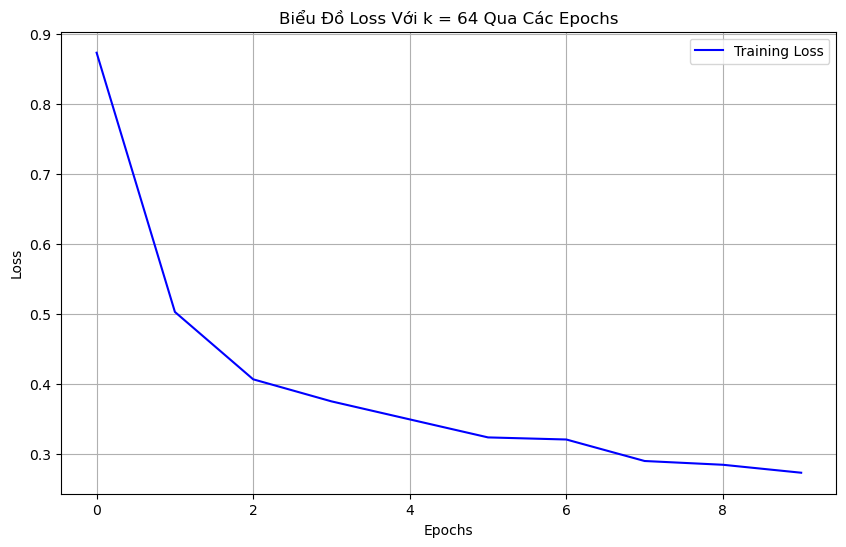

In [49]:
# Lọc kết quả cho k = 16
k_64_result = next(result for result in results if result[0] == 64)

# Lấy đối tượng `history` từ kết quả cho k = 64
history_k_64 = k_64_result[-1]

# Kiểm tra xem có dữ liệu `val_loss` không
has_val_loss = 'val_loss' in history_k_64.history

# Vẽ biểu đồ loss cho k = 64
plt.figure(figsize=(10, 6))
plt.plot(history_k_64.history['loss'], label='Training Loss', color='blue')
if has_val_loss:
    plt.plot(history_k_64.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Biểu Đồ Loss Với k = 64 Qua Các Epochs')
plt.legend(loc='upper right')  # Thêm chú thích
plt.grid(True)
plt.show()
